# Insert Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as pip

# Importing data

In [2]:
import os
print(os.getcwd())

D:\Data Analysis\Project\Use Case Value\Week 2


In [3]:
sales_df = pd.read_excel(r"D:\Data Analysis\Project\Use Case Value\Week 2\sales_cleaned.xlsx")
sales_df

,Unnamed: 0,Ticket Number,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Service type,...,Period_To,Cost Rate,Department,Start Date,End Date,Stage,Site,Severity,Ticket Origin,Month
0,0,Tict1,0WK1000,Under Development,EG_02,20,2022_W33,29,19,NaN,...,2022_W42,33.32,Visibility,2022-03-17,2022-09-01,Closed,Russia,Red,Customer,2022-09
1,1,Tict2,0WK1000,Under Development,EG_02,40,2022_W37,9,18,NaN,...,2022_W42,33.32,Visibility,2022-08-08,2022-10-27,Closed,Russia,Orange,Quality,2022-10
2,2,Tict3,0WK1000,Under Development,EG_02,5,2022_W25,10,27,NaN,...,2022_W42,33.32,Visibility,2022-06-30,2022-10-31,Closed,Russia,Green,Customer,2022-10
3,3,Tict4,0WK1000,Under Development,EG_02,20,2022_W25,14,38,NaN,...,2022_W42,33.32,Visibility,2022-01-31,2022-09-26,Under Implementation,Russia,Green,Quality,2022-09
4,4,Tict5,0WK1000,Under Development,EG_02,8,2022_W34,21,12,NaN,...,2022_W42,33.32,Visibility,2022-05-23,2022-10-03,Closed,Russia,Orange,Supplier,2022-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80344,80344,Tict80345,W201263,Under Development,EG_02,6,2022_W27,38,32,NaN,...,2022_W42,33.32,Wippers,2022-03-24,2022-10-10,Closed,Russia,Green,Functional Validation,2022-10
80345,80345,Tict80346,W201355,Post SOP,EG_02,3,2022_W26,9,18,NaN,...,2022_W42,33.32,Wippers,2022-07-11,2022-10-03,Closed,Russia,Orange,System,2022-10
80346,80346,Tict80347,W201368,Post SOP,EG_02,40,2022_W25,7,25,NaN,...,2022_W42,33.32,Wippers,2022-04-29,2022-10-26,Under Analysis,Russia,Orange,Optical,2022-10
80347,80347,Tict80348,W211011,Closed,EG_02,24,2022_W26,8,33,NaN,...,2022_W42,33.32,Wippers,2022-05-25,2022-09-23,Integrated,Russia,Yellow,System,2022-09


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80349 entries, 0 to 80348
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        80349 non-null  int64         
 1   Ticket Number     80349 non-null  object        
 2   Project Code      80349 non-null  object        
 3   Project_Status    80349 non-null  object        
 4   Calendar          80349 non-null  object        
 5   Hours             80349 non-null  int64         
 6   Week              80349 non-null  object        
 7   Forecasted hours  80349 non-null  int64         
 8   Budget Hours      80349 non-null  int64         
 9   Service type      10393 non-null  object        
 10  Period_From       80349 non-null  object        
 11  Period_To         80349 non-null  object        
 12  Cost Rate         80349 non-null  float64       
 13  Department        80349 non-null  object        
 14  Start Date        8034

In [5]:
# Ensure Date columns are in the correct format
sales_df['Start Date'] = pd.to_datetime(sales_df['Start Date'], errors='coerce')
sales_df['End Date'] = pd.to_datetime(sales_df['End Date'], errors='coerce')

# Question 1: Which departments handle the most tickets? (Bar Chart)

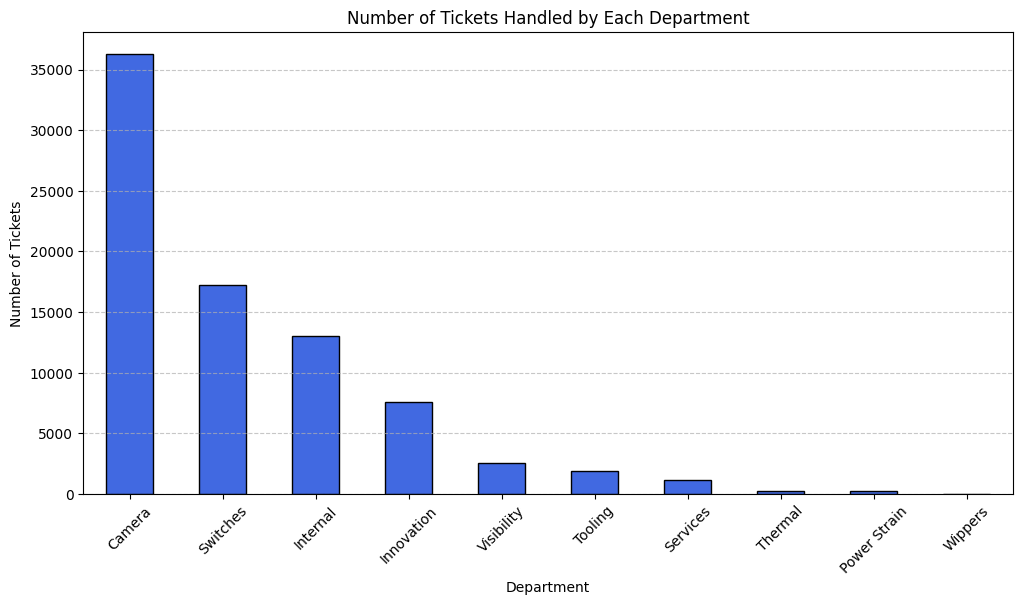

In [9]:
department_counts = sales_df['Department'].value_counts()
plt.figure(figsize=(12, 6))
department_counts.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel('Department')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets Handled by Each Department')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 2: How do forecasted and budgeted hours compare by month? (Stacked Bar Chart)

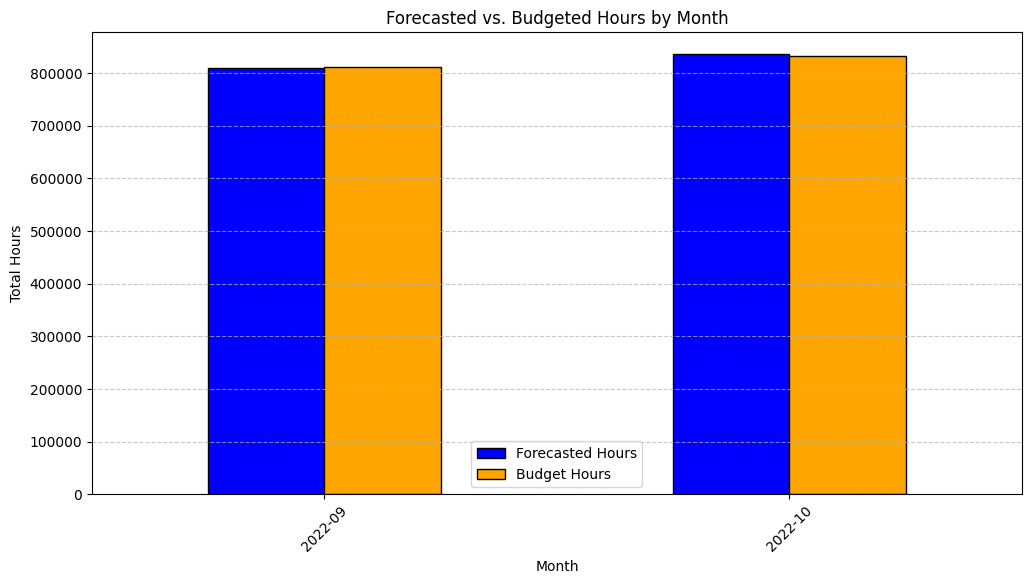

In [7]:
monthly_hours = sales_df.groupby("Month")[["Forecasted hours", "Budget Hours"]].sum()
monthly_hours.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'], edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Total Hours')
plt.title('Forecasted vs. Budgeted Hours by Month')
plt.xticks(rotation=45)
plt.legend(["Forecasted Hours", "Budget Hours"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 3:  Which sites have the most tickets? (Bar Chart)



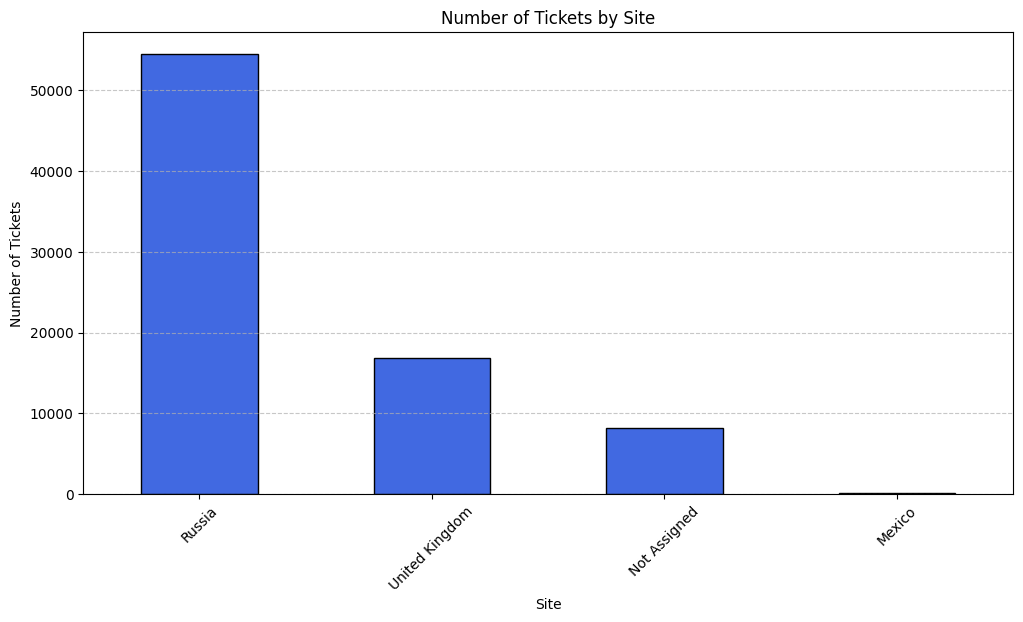

In [10]:
site_counts = sales_df['Site'].value_counts()
plt.figure(figsize=(12, 6))
site_counts.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel('Site')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets by Site')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Question 4:Trend of Open vs. Closed Projects Over Time (Stacked Line Chart)

<Figure size 1200x600 with 0 Axes>

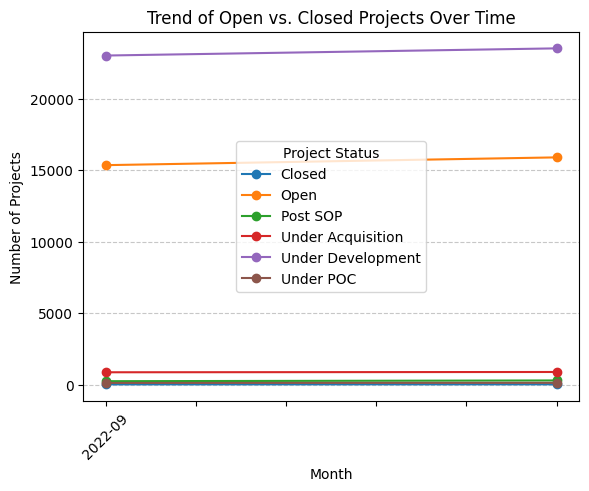

In [11]:
project_trend = sales_df.groupby(["Month", "Project_Status"]).size().unstack()
plt.figure(figsize=(12, 6))
project_trend.plot(kind='line', marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Number of Projects")
plt.title("Trend of Open vs. Closed Projects Over Time")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Project Status")
plt.show()

# Question 5:Which service types consume the most hours? (Bar Chart)

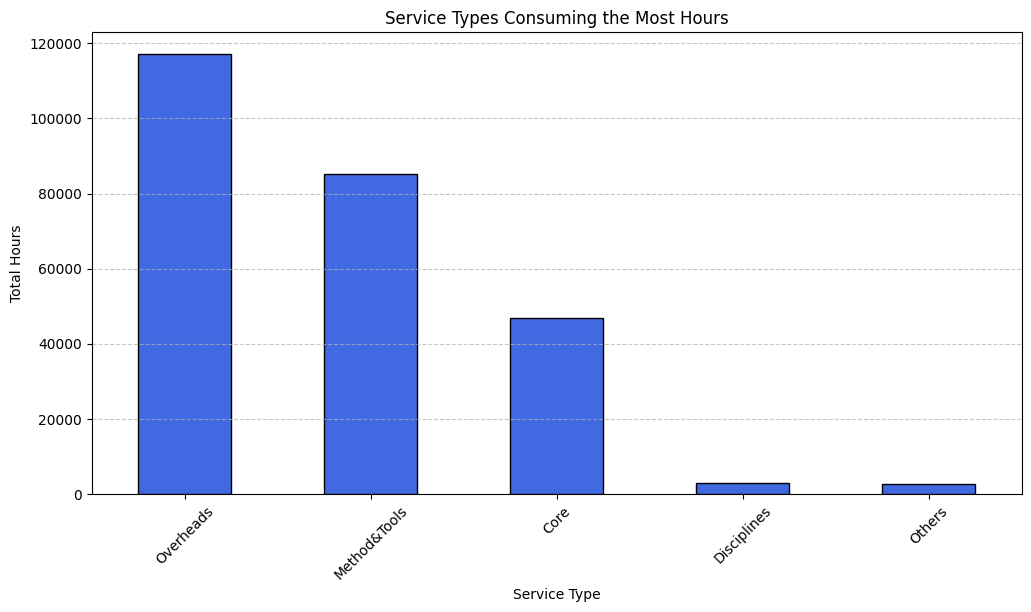

In [12]:
service_hours = sales_df.groupby("Service type")["Hours"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
service_hours.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("Service Type")
plt.ylabel("Total Hours")
plt.title("Service Types Consuming the Most Hours")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 6 How does ticket origin vary across different sites? (Stacked Bar Chart)

<Figure size 1200x600 with 0 Axes>

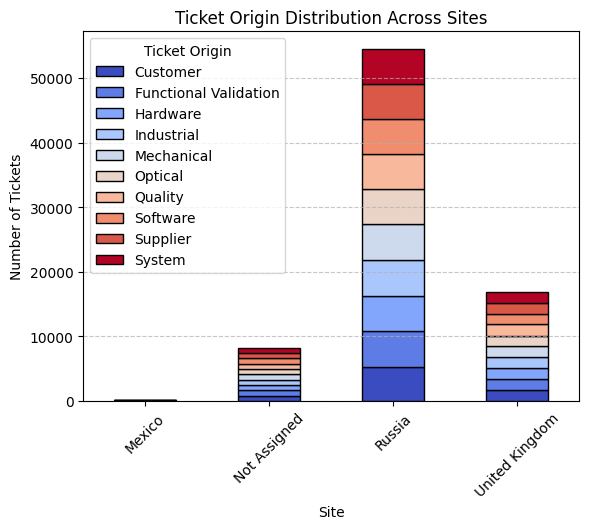

In [13]:
plt.figure(figsize=(12, 6))
ticket_origin_site = sales_df.groupby(["Site", "Ticket Origin"]).size().unstack()
ticket_origin_site.plot(kind='bar', stacked=True, colormap="coolwarm", edgecolor='black')
plt.xlabel("Site")
plt.ylabel("Number of Tickets")
plt.title("Ticket Origin Distribution Across Sites")
plt.xticks(rotation=45)
plt.legend(title="Ticket Origin")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question7: How does the number of tickets vary by week? (Line Chart)


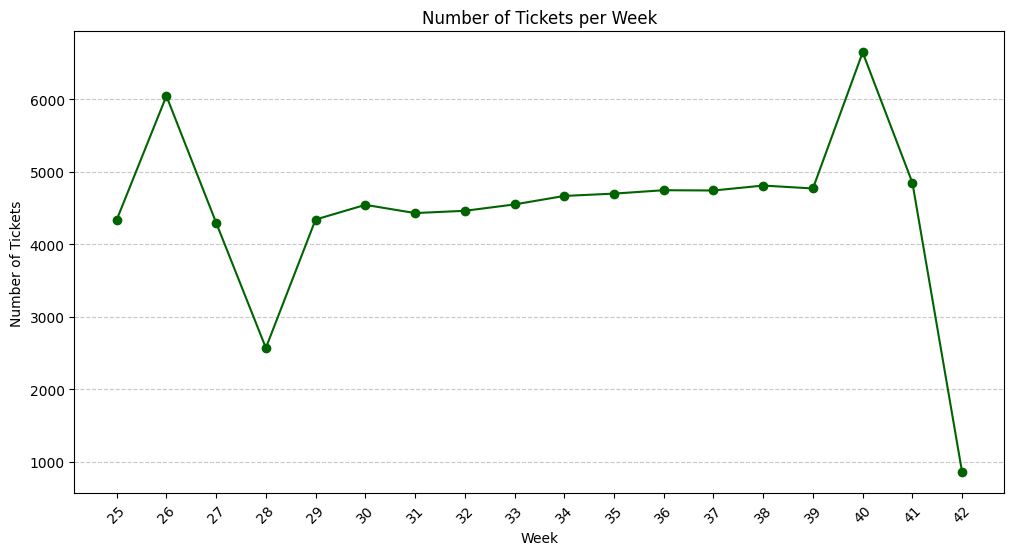

In [17]:
# Extract only the week number (WXX) without the year
sales_df['Week_Only'] = sales_df['Week'].str.extract(r'W(\d{2})')
# Grouping by Week_Only to count the number of tickets
weekly_tickets = sales_df.groupby("Week_Only").size()
plt.figure(figsize=(12, 6))
plt.plot(weekly_tickets.index, weekly_tickets.values, marker='o', linestyle='-', color='darkgreen')
plt.xlabel("Week")
plt.ylabel("Number of Tickets")
plt.title("Number of Tickets per Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 8: Most Common Types of Tickets Based on "Stage" and "Site"

<Figure size 1200x600 with 0 Axes>

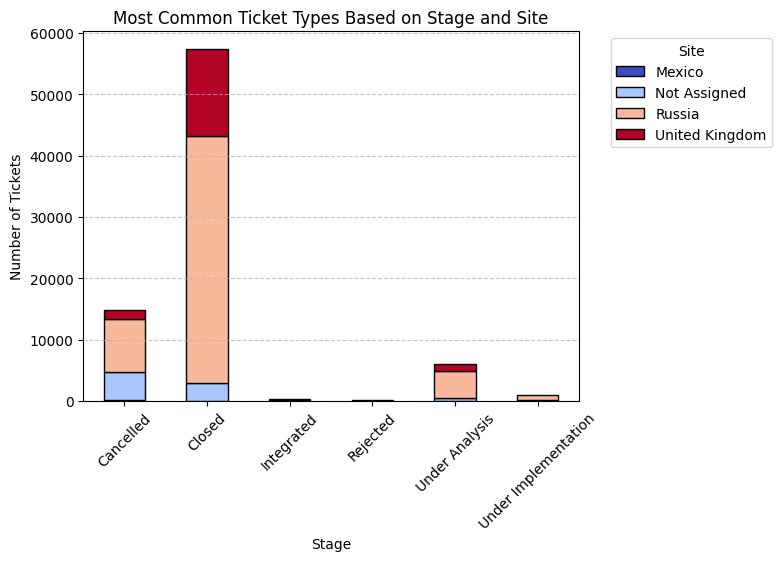

In [34]:
ticket_counts = sales_df.groupby(["Stage", "Site"]).size().unstack()
plt.figure(figsize=(12, 6))
ticket_counts.plot(kind='bar', stacked=True, colormap="coolwarm", edgecolor='black')
plt.xlabel("Stage")
plt.ylabel("Number of Tickets")
plt.title("Most Common Ticket Types Based on Stage and Site")
plt.xticks(rotation=45)
plt.legend(title="Site", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 9: Projects Expected to Require the Most Hours in the Future (Bar Chart)

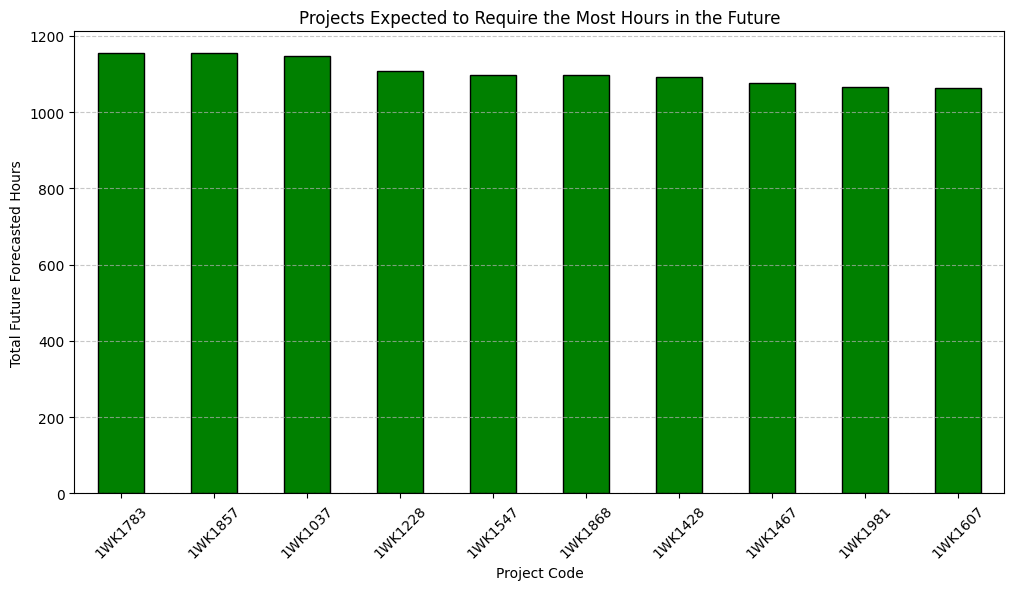

In [23]:
future_hours = sales_df.groupby("Project Code")["Forecasted hours"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
future_hours.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel("Project Code")
plt.ylabel("Total Future Forecasted Hours")
plt.title("Projects Expected to Require the Most Hours in the Future")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 10: Project Classification Based on "Number of Hours" and "Budget" (Scatter Plot)


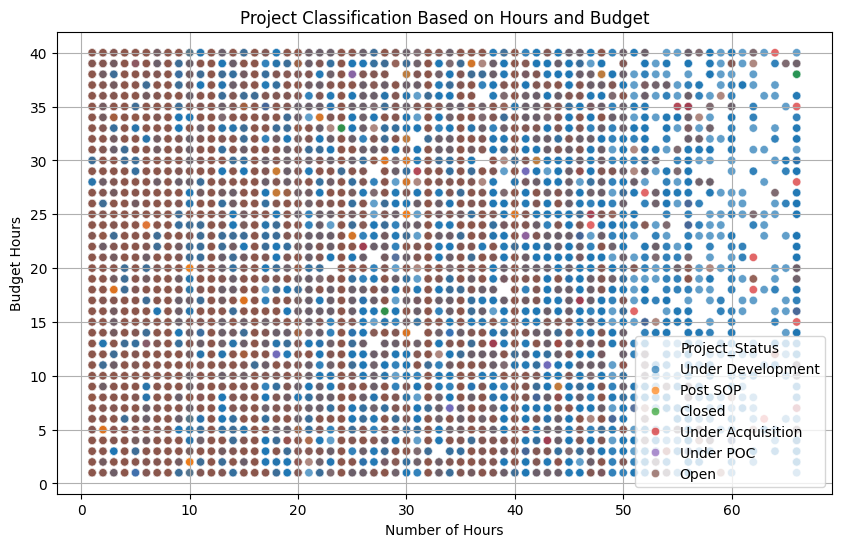

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_df["Hours"], y=sales_df["Budget Hours"], hue=sales_df["Project_Status"], alpha=0.7)
plt.xlabel("Number of Hours")
plt.ylabel("Budget Hours")
plt.title("Project Classification Based on Hours and Budget")
plt.grid(True)
plt.show()

# Question 11: Projects That Might Need Additional Resources Based on Hours or Cost

In [ ]:
# Calculate actual cost and budgeted cost
Projectmanagment_table['Actual_Cost'] = Projectmanagment_table['Hours'] * Projectmanagment_table['Cost Rate']
Projectmanagment_table['Budgeted_Cost'] = Projectmanagment_table['Budget Hours'] * Projectmanagment_table['Cost Rate']

# Calculate overruns
Projectmanagment_table['Hours_Overrun'] = Projectmanagment_table['Hours'] - Projectmanagment_table['Budget Hours']
Projectmanagment_table['Cost_Overrun'] = Projectmanagment_table['Actual_Cost'] - Projectmanagment_table['Budgeted_Cost']

# Filter projects that need additional resources
overrun_projects = Projectmanagment_table[(Projectmanagment_table['Hours'] > Projectmanagment_table['Budget Hours']) | (Projectmanagment_table['Actual_Cost'] > Projectmanagment_table['Budgeted_Cost'])]

# Display relevant columns
overrun_projects[['Project_ID', 'Project Code', 'Project_Status', 'Hours', 'Budget Hours', 'Hours_Overrun', 'Actual_Cost', 'Budgeted_Cost', 'Cost_Overrun']]

<Figure size 1200x600 with 0 Axes>

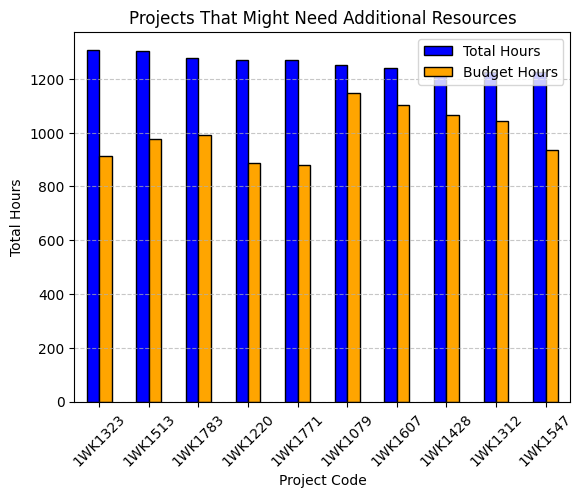

In [26]:
high_hours_projects = sales_df.groupby("Project Code")[["Hours", "Budget Hours"]].sum().sort_values(by="Hours", ascending=False).head(10)
plt.figure(figsize=(12, 6))
high_hours_projects.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.xlabel("Project Code")
plt.ylabel("Total Hours")
plt.title("Projects That Might Need Additional Resources")
plt.xticks(rotation=45)
plt.legend(["Total Hours", "Budget Hours"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question12: How does ticket severity vary across project statuses? (Stacked Bar Chart)

<Figure size 1200x600 with 0 Axes>

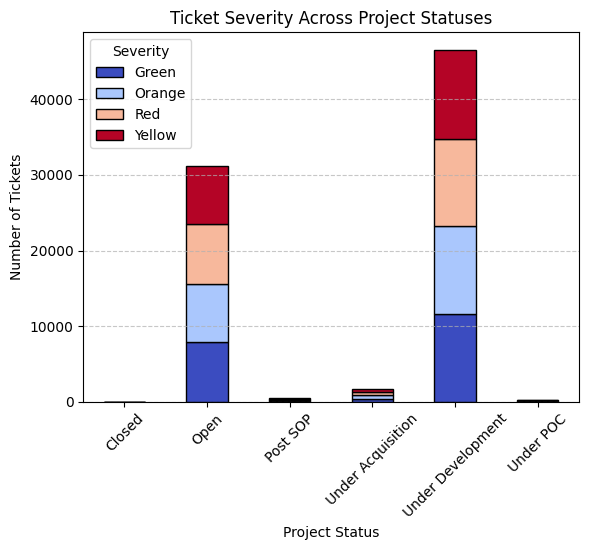

In [28]:
severity_status = sales_df.groupby(["Project_Status", "Severity"]).size().unstack()
plt.figure(figsize=(12, 6))
severity_status.plot(kind='bar', stacked=True, colormap="coolwarm", edgecolor='black')
plt.xlabel("Project Status")
plt.ylabel("Number of Tickets")
plt.title("Ticket Severity Across Project Statuses")
plt.xticks(rotation=45)
plt.legend(title="Severity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question12:Is there an increasing trend in the number of "Closed" or "Open" tickets over time? 

<Figure size 1200x600 with 0 Axes>

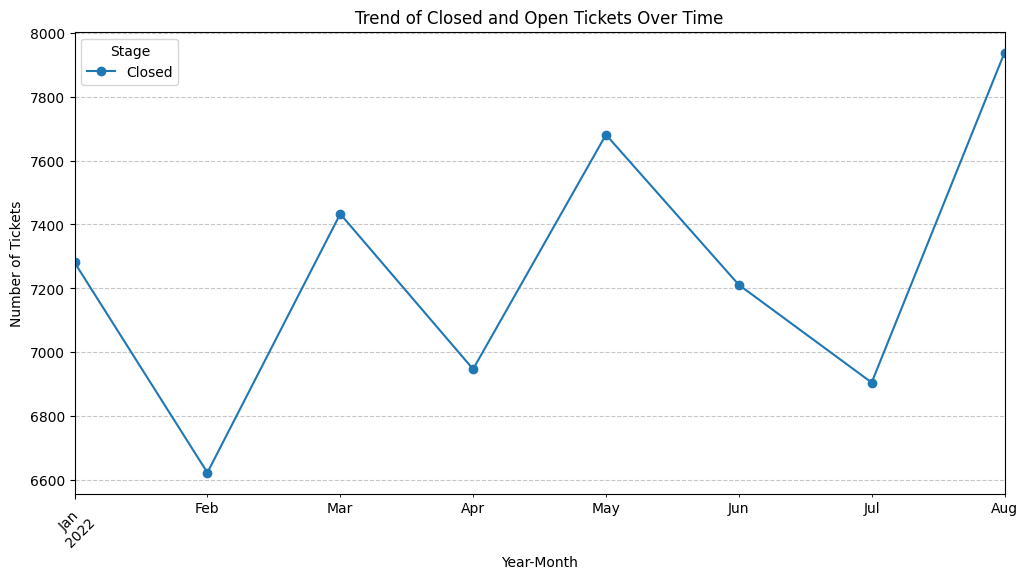

In [37]:
sales_df["Start Date"] = pd.to_datetime(sales_df["Start Date"], errors='coerce')

# Filter for 'Closed' and 'Open' tickets
df_filtered = sales_df[sales_df['Stage'].isin(['Closed', 'Open'])].copy()

# Extract Year-Month
df_filtered['Year_Month'] = df_filtered['Start Date'].dt.to_period('M')

# Group by year and month, count the number of tickets
ticket_trend = df_filtered.groupby(['Year_Month', 'Stage']).size().unstack(fill_value=0)

# Plot the trend
plt.figure(figsize=(12, 6))
ticket_trend.plot(kind='line', marker='o', linestyle='-', figsize=(12, 6))
plt.xlabel("Year-Month")
plt.ylabel("Number of Tickets")
plt.title("Trend of Closed and Open Tickets Over Time")
plt.xticks(rotation=45)
plt.legend(title="Stage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question13 Is there a relationship between "Project Status" and "Forecast Budget"?

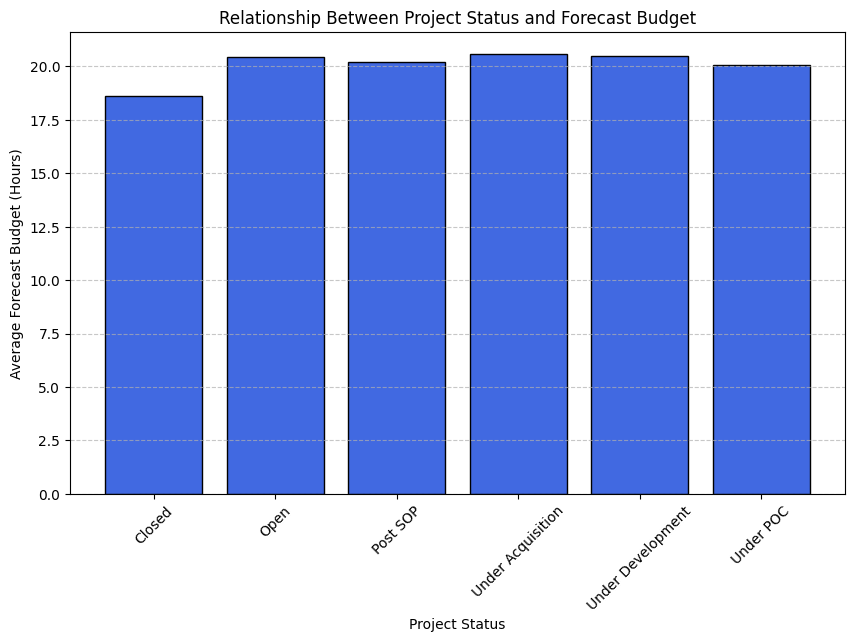

In [41]:
# Ensure 'Project_Status' and 'Forecasted hours' exist in the dataframe
if "Project_Status" in sales_df.columns and "Forecasted hours" in sales_df.columns:
    
    # Group by 'Project_Status' and calculate the mean of 'Forecasted hours'
    status_budget_relationship = sales_df.groupby("Project_Status")["Forecasted hours"].mean().reset_index().round(2)

    # Rename column for clarity
    status_budget_relationship.rename(columns={"Forecasted hours": "Avg_Forecast_Budget"}, inplace=True)

    # Ensure 'Project_Status' is used as an index for plotting
    status_budget_relationship = status_budget_relationship.set_index("Project_Status")

    # Plot the relationship
    plt.figure(figsize=(10, 6))
    plt.bar(status_budget_relationship.index, status_budget_relationship["Avg_Forecast_Budget"], 
            color='royalblue', edgecolor='black')

    # Labels and title
    plt.xlabel("Project Status")
    plt.ylabel("Average Forecast Budget (Hours)")
    plt.title("Relationship Between Project Status and Forecast Budget")

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

else:
    print("❌ Columns 'Project_Status' or 'Forecasted hours' are missing in the dataset.")
plt.show()


# Question 14 -What is the average number of hours worked per month for each project?


In [ ]:
# Calculate the average hours worked per month for each project
avg_hours_per_project = sales_df.groupby('Project Code')['Hours'].mean().reset_index()
# Rename the column for clarity
avg_hours_per_project.rename(columns={'Hours': 'Avg_Hours_Per_Month'}, inplace=True)

avg_hours_per_project

# Question 15 : what is the total time spent in each stage of the project?

In [44]:
# Group by 'Stage' and sum the 'Hours'
total_time_per_stage = sales_df.groupby('Stage')['Hours'].sum().reset_index()

# Sort by total hours in descending order
total_time_per_stage = total_time_per_stage.sort_values(by='Hours', ascending=False)

total_time_per_stage

,Stage,Hours
1,Closed,1286830
0,Cancelled,325925
4,Under Analysis,135058
5,Under Implementation,21113
2,Integrated,7303
3,Rejected,3664


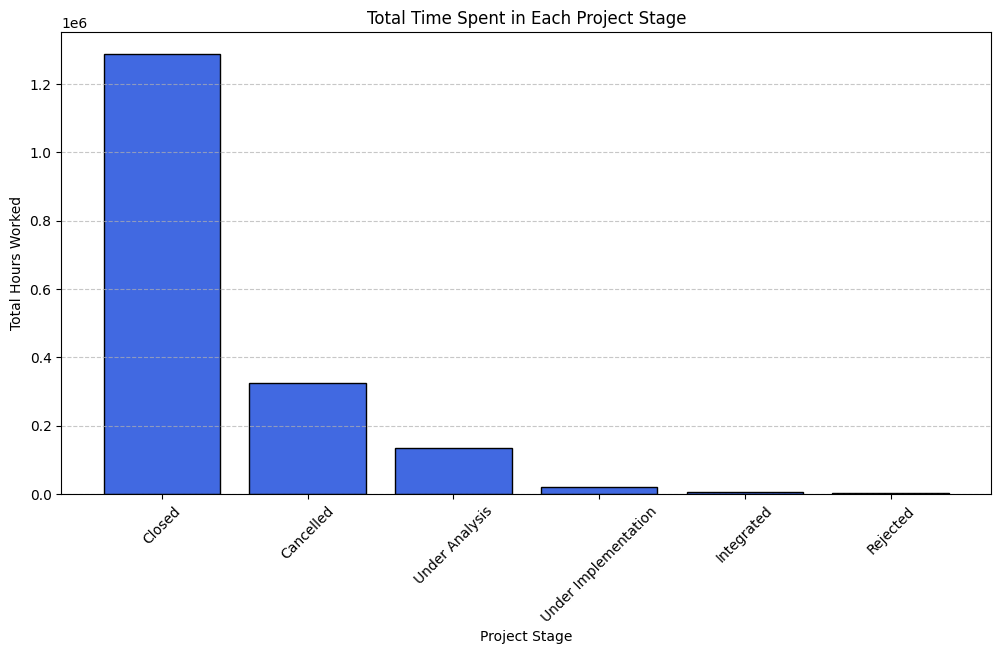

In [46]:
plt.figure(figsize=(12, 6))
plt.bar(total_time_per_stage["Stage"], total_time_per_stage["Hours"], color='royalblue', edgecolor='black')

# Labels and title
plt.xlabel("Project Stage")
plt.ylabel("Total Hours Worked")
plt.title("Total Time Spent in Each Project Stage")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Question 16 :How are costs distributed across different departments ( "Camera" and "Internal")?


  Department  Total_Cost  Avg_Cost
0     Camera  1209249.44     33.32
1   Internal   434459.48     33.32


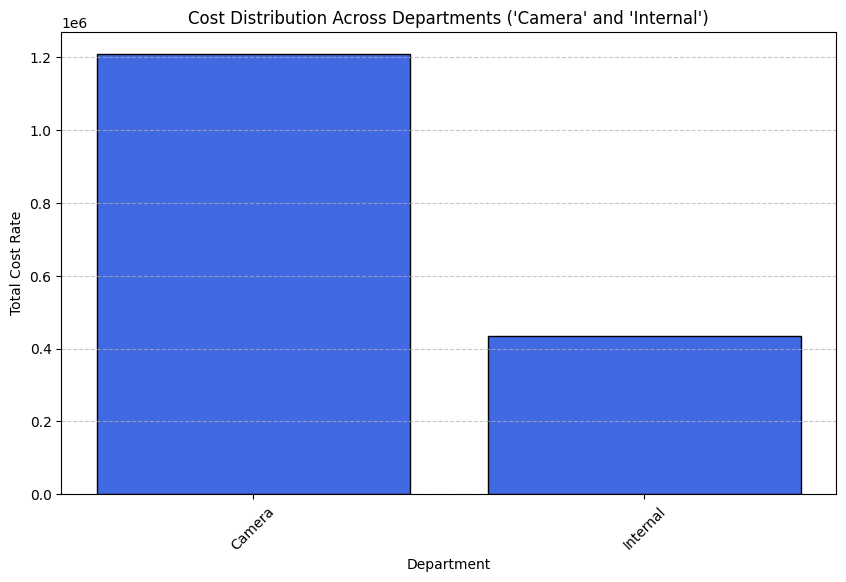

In [53]:
filtered_data = sales_df[sales_df['Department'].isin(['Camera', 'Internal'])]

# Group by 'Department' and calculate the total and average cost rate
cost_distribution = filtered_data.groupby('Department')['Cost Rate'].agg(['sum', 'mean']).reset_index().round(2)

# Rename columns for clarity
cost_distribution.rename(columns={'sum': 'Total_Cost', 'mean': 'Avg_Cost'}, inplace=True)

# Print the dataframe instead of using ace_tools
print(cost_distribution)

# Plot the cost distribution
plt.figure(figsize=(10, 6))
plt.bar(cost_distribution["Department"], cost_distribution["Total_Cost"], color='royalblue', edgecolor='black')

# Labels and title
plt.xlabel("Department")
plt.ylabel("Total Cost Rate")
plt.title("Cost Distribution Across Departments ('Camera' and 'Internal')")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Question17 :-Which projects are expected to require the most hours in the future? 

In [56]:
sorted_df =  sales_df.sort_values(by='Forecasted hours', ascending=False)

# Get the top 10 projects with the highest forecasted hours
top_projects = sorted_df[['Project Code', 'Forecasted hours']].head(10)

top_projects

,Project Code,Forecasted hours
80302,L222984,40
45500,2WK1910,40
17994,1WK1448,40
18018,1WK1449,40
9976,1WK1215,40
45544,2WK1915,40
42,0WK1013,40
79,0WK1027,40
80,0WK1028,40
80329,T271563,40


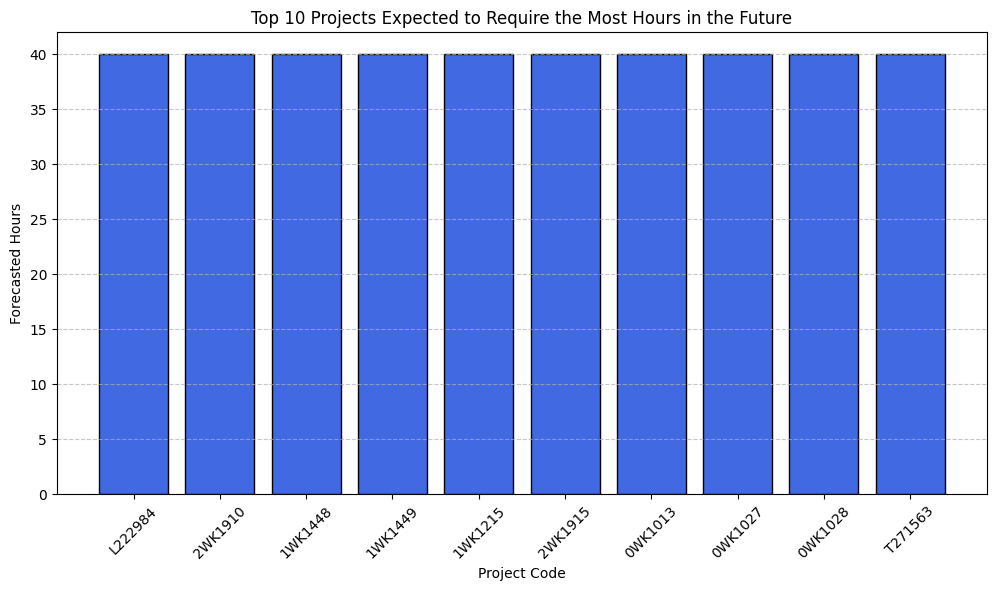

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(top_projects["Project Code"], top_projects["Forecasted hours"], color='royalblue', edgecolor='black')

# Labels and title
plt.xlabel("Project Code")
plt.ylabel("Forecasted Hours")
plt.title("Top 10 Projects Expected to Require the Most Hours in the Future")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Question 18-How can projects be classified based on "Number of Hours" and "Budget"?

In [59]:
# Clean data by removing rows with NULL in "Hours" and "Budget Hours"
df_cleaned = sales_df.dropna(subset=['Hours', 'Budget Hours'])

# Add "NOT FOUND" for missing "Service type"
df_cleaned['Service type'] = df_cleaned['Service type'].fillna('NOT FOUND')

# Define classification logic for "Number of Hours"
def classify_hours(hours):
    if hours < 100:
        return 'Small'
    elif 100 <= hours <= 500:
        return 'Medium'
    else:
        return 'Large'

# Define classification logic for "Budget Hours"
def classify_budget(budget):
    if budget < 1000:
        return 'Low Budget'
    elif 1000 <= budget <= 5000:
        return 'Medium Budget'
    else:
        return 'High Budget'

# Apply classification functions
df_cleaned['Hours_Classification'] = df_cleaned['Hours'].apply(classify_hours)
df_cleaned['Budget_Classification'] = df_cleaned['Budget Hours'].apply(classify_budget)


df_cleaned.head()

,Unnamed: 0,Ticket Number,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Service type,...,Start Date,End Date,Stage,Site,Severity,Ticket Origin,Month,Week_Only,Hours_Classification,Budget_Classification
0,0,Tict1,0WK1000,Under Development,EG_02,20,2022_W33,29,19,NOT FOUND,...,2022-03-17,2022-09-01,Closed,Russia,Red,Customer,2022-09,33,Small,Low Budget
1,1,Tict2,0WK1000,Under Development,EG_02,40,2022_W37,9,18,NOT FOUND,...,2022-08-08,2022-10-27,Closed,Russia,Orange,Quality,2022-10,37,Small,Low Budget
2,2,Tict3,0WK1000,Under Development,EG_02,5,2022_W25,10,27,NOT FOUND,...,2022-06-30,2022-10-31,Closed,Russia,Green,Customer,2022-10,25,Small,Low Budget
3,3,Tict4,0WK1000,Under Development,EG_02,20,2022_W25,14,38,NOT FOUND,...,2022-01-31,2022-09-26,Under Implementation,Russia,Green,Quality,2022-09,25,Small,Low Budget
4,4,Tict5,0WK1000,Under Development,EG_02,8,2022_W34,21,12,NOT FOUND,...,2022-05-23,2022-10-03,Closed,Russia,Orange,Supplier,2022-10,34,Small,Low Budget


# Question 19 -How can projects be classified based on "Number of Hours" and "Budget"?

In [62]:
# Filter only the required columns: Project_ID, Project Code, Hours_Classification, and Budget_Classification
df_filtered_columns = df_cleaned[['Project Code', 'Hours_Classification', 'Budget_Classification']]
df_filtered_columns
# Calculate the total cost for each department
df_cleaned['Total_Cost'] = df_cleaned['Hours'] * df_cleaned['Cost Rate']

# Group by Department and sum the total cost and total hours
result = df_cleaned.groupby('Department').agg(
    Total_Cost=('Total_Cost', 'sum'),
    Total_Hours=('Hours', 'sum')
).reset_index()
# Sort by Total_Cost in descending order
result = result.sort_values(by='Total_Cost', ascending=False)

result

,Department,Total_Cost,Total_Hours
0,Camera,28105953.12,843516
2,Internal,10649805.04,319622
5,Switches,9639609.28,289304
1,Innovation,6309341.92,189356
8,Visibility,1996967.56,59933
7,Tooling,1572070.92,47181
4,Services,667099.72,20021
6,Thermal,188491.24,5657
3,Power Strain,173330.64,5202
9,Wippers,3365.32,101
